# imports


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import classification_report,plot_precision_recall_curve,plot_roc_curve,plot_confusion_matrix,confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.pipeline import Pipeline

In [31]:
# Organizing Data

In [32]:
# global Variables
random_state = 3 # random_state variable is chosen to be 3 for all algorithms to ensure fair comparison

In [33]:
df = pd.read_csv('data.csv',index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


<AxesSubplot:xlabel='result', ylabel='count'>

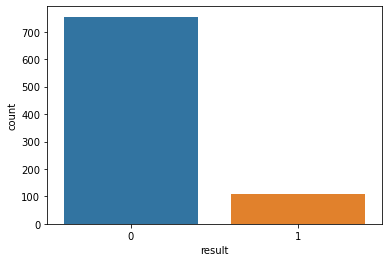

In [34]:
sns.countplot(x='result',data=df)

In [35]:
#splitting the data into features and labels
X = df.drop(['result'],axis=1)
y = df['result']

# spliting the date 0.9 for cross validation (simply train & test) and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [36]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
#Logistic model
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [38]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [39]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
print(grid_model)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})


In [40]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [41]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [42]:
y_pred = grid_model.predict(scaled_X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.9425287356321839

In [44]:
confusion_matrix(y_test,y_pred)

array([[77,  2],
       [ 3,  5]], dtype=int64)

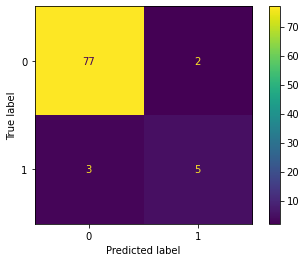

In [45]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.71      0.62      0.67         8

    accuracy                           0.94        87
   macro avg       0.84      0.80      0.82        87
weighted avg       0.94      0.94      0.94        87



In [47]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

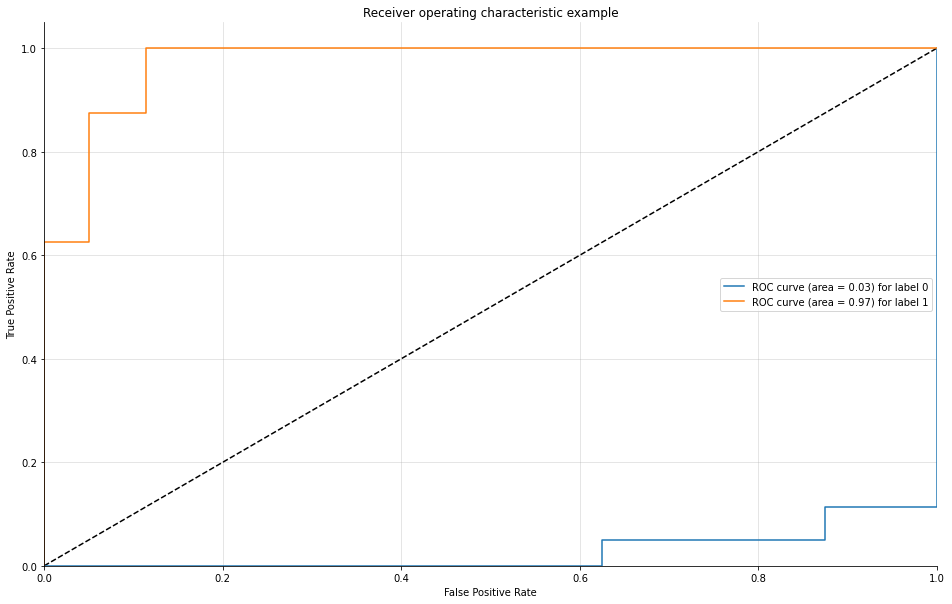

In [51]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=2, figsize=(16, 10))

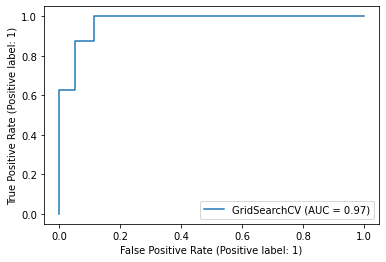

In [52]:
plot_roc_curve(grid_model,scaled_X_test,y_test)